# !Link to challenge!

# https://www.kaggle.com/t/b3ced76a60b94572a90740756f778fc8

### Ideas:

- Use some of test set for training? 
- Is training / validation split (0.1/0.9) appropriate? 

### Metric

For binary classification with a true label y $\in \{0,1\}$ and a probability estimate p = $\operatorname{Pr}(y = 1)$, the log loss per sample is the negative log-likelihood of the classifier given the true label:
$$
L_{\log}(y, p) = -\log \operatorname{Pr}(y|p) = -(y \log (p) + (1 - y) \log (1 - p))$
$$

This extends to the multiclass case as follows. Let the true labels for a set of samples be encoded as a 1-of-K binary indicator matrix Y, i.e., $y_{i,k} = 1$ if sample i has label k taken from a set of K labels. Let P be a matrix of probability estimates, with $p_{i,k} = \operatorname{Pr}(t_{i,k} = 1)$. Then the log loss of the whole set is

$$
L_{\log}(Y, P) = -\log \operatorname{Pr}(Y|P) = - \frac{1}{N} \sum_{i=0}^{N-1} \sum_{k=0}^{K-1} y_{i,k} \log p_{i,k}
$$

# Grading

#### Firstly, to get any mark, you must beat medium baseline score

Your grade after challenge ends will be calculated as this:
$$
Grade = \frac{score - mid\_baseline\_score}{\#1\_score - mid\_baseline\_score} * 10
$$

where score will be taken from private part results.

## About

In this notebook we prepare a simple solution.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [ ]:
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

### Read training and test files

In [3]:
%%notify
#data = pd.read_csv('/Users/bainbrid/Repositories/MLatImperial2018/03_lab/training.csv')
#test = pd.read_csv('/Users/bainbrid/Repositories/MLatImperial2018/03_lab/test.csv')
data = pd.read_csv('/data/pid-training.csv')
test = pd.read_csv('/data/pid-test.csv')

<IPython.core.display.Javascript object>

In [4]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In [5]:
test.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,ID
0,55086.199233,18.0,-0.438763,0.0,1.0,3.2,-1.843821,-4.579244,1.0,-1.732886,...,1.0,18.674086,-1.355015,24510.990244,0.0,1.0,9.325265,-0.250015,35.408585,0
1,3393.820071,17.0,-0.554341,0.0,1.0,0.0,-0.883237,-6.203035,1.0,-0.097206,...,1.0,16.536804,-17.601196,778.675303,0.0,1.0,-0.000006,-6.646096,14.011904,1
2,18341.359361,12.0,-0.554339,0.0,1.0,0.0,-2.653786,-3.922639,1.0,0.936484,...,1.0,-1.306109,-4.536409,7915.212420,0.0,1.0,1.371346,-2.132609,-5.617409,2
3,27486.710933,7.0,-0.492411,1.0,1.0,3.2,-999.000000,2.034453,1.0,-999.000000,...,1.0,-4.222793,3.149207,-999.000000,1.0,1.0,61.985428,0.946207,-8.657193,3
4,6842.249996,16.0,0.098706,0.0,1.0,3.2,2.644499,-1.471364,1.0,-2.909470,...,1.0,-3.425113,23.147387,-0.000013,0.0,1.0,2.468453,2.614987,-5.713513,4


### Feature engineering

In [222]:
dct = {'Electron':0, 'Ghost':1, 'Kaon':2, 'Muon':3, 'Pion':4, 'Proton':5}

df = data[['DLLmuon','DLLelectron','DLLproton','DLLkaon']]
df['Guess'] = df.idxmax(axis=1)
df['Guess'][df.max(axis=1)<0.] = 'DLLpion'
df['Guess'] = df['Guess'].apply(lambda x : x.strip('DLL').title())
data['Guess'] = df['Guess'].apply(lambda x : dct[x])

df = test[['DLLmuon','DLLelectron','DLLproton','DLLkaon']]
df['Guess'] = df.idxmax(axis=1)
df['Guess'][df.max(axis=1)<0.] = 'DLLpion'
df['Guess'] = df['Guess'].apply(lambda x : x.strip('DLL').title())
test['Guess'] = df['Guess'].apply(lambda x : dct[x])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/s

In [254]:
#data.drop('Guess',axis=1,inplace=True)
#data['Guess'],test['Guess']

### Feature and target labels

In [255]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

In [256]:
hist = data['Label'].value_counts(dropna=False)
hist,hist.sum()

(Ghost       200000
 Kaon        200000
 Electron    200000
 Muon        200000
 Proton      200000
 Pion        200000
 Name: Label, dtype: int64, 1200000)

In [257]:
target = 'Label'
engineered = 'Guess'
features = list(set(data.columns) - {target})# - {engineered})
print(features)
print(target)

['DLLmuon', 'TrackQualitySubdetector1', 'PrsDLLbeElectron', 'FlagBrem', 'HcalDLLbeMuon', 'FlagRICH1', 'Calo3dFitQuality', 'BremDLLbeElectron', 'RICH_DLLbeBCK', 'RICH_DLLbeKaon', 'TrackQualityPerNDoF', 'HcalDLLbeElectron', 'TrackDistanceToZ', 'FlagRICH2', 'TrackP', 'RICHpFlagPion', 'FlagEcal', 'DLLkaon', 'RICHpFlagMuon', 'RICHpFlagProton', 'TrackNDoF', 'TrackQualitySubdetector2', 'TrackNDoFSubdetector1', 'EcalShowerLongitudinalParameter', 'EcalDLLbeElectron', 'HcalE', 'Calo2dFitQuality', 'MuonLLbeMuon', 'EcalE', 'MuonLooseFlag', 'FlagPrs', 'RICH_DLLbeElectron', 'TrackPt', 'EcalDLLbeMuon', 'RICH_DLLbeProton', 'MuonLLbeBCK', 'GhostProbability', 'RICHpFlagElectron', 'FlagSpd', 'SpdE', 'FlagMuon', 'RICHpFlagKaon', 'DLLelectron', 'MuonFlag', 'PrsE', 'TrackNDoFSubdetector2', 'RICH_DLLbeMuon', 'DLLproton', 'FlagHcal']
Label


### Divide data into training and validation (and local test) 

In [258]:
training_data, _data = train_test_split(data,random_state=1,train_size=0.1)
validation_data, test_data = train_test_split(_data,random_state=1,train_size=0.3)
print(training_data.shape)
print(validation_data.shape)
print(test_data.shape)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(120000, 50)
(324000, 50)
(756000, 50)


### xgBoost and other libraries

In [259]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
#from xgboost import XGBRegressor

### Split features and target for training and validation data 

In [260]:
X_train = training_data[features]
print(len(features))
print(X_train.shape)
#print(X_train)
y_train = training_data[target]
print(y_train.shape)
#print(y_train)

X_valid = validation_data[features]
print(len(features))
print(X_valid.shape)
#print(X_valid)
y_valid = validation_data[target]
print(y_valid.shape)
#print(y_valid)


#label_encoder = LabelEncoder()
#y_train = label_encoder.fit_transform(y_train)
#print(y_train.shape)
#print(y_train)
#train.drop('OutcomeType', axis=1, inplace=True)

49
(120000, 49)
(120000,)
49
(324000, 49)
(324000,)


### Perform grid search with cross validation

In [ ]:
%%time
%%notify

# classifier with default params 
clf = XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    max_depth=3,
    learning_rate =0.1,
)

# params for grid search 
params = {
 'n_estimators':[300],
 'max_depth':[4],
 'learning_rate':[0.2,0.25,0.3,0.35],
}

#min_samples_leaf:[0,] 
#max_leaf_nodes:[10,20,None]

# grid search
gscv = GridSearchCV(
    estimator = clf,
    param_grid = params, 
    cv=3,
    n_jobs=-1,
    scoring='neg_log_loss',
    verbose = 100)

# fit to training data, performing grid search using cross validation 
gscv.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] learning_rate=0.2, max_depth=4, n_estimators=300 ................
Pickling array (shape=(49,), dtype=object).
Pickling array (shape=(120000,), dtype=int64).
Memmaping (shape=(49, 120000), dtype=float64) to new file /dev/shm/joblib_memmaping_pool_18592_140325509347256/18592-140325531037592-b389aa49dccfee334978e43acd524d73.pkl
Pickling array (shape=(49,), dtype=object).
Pickling array (shape=(120000,), dtype=object).
Pickling array (shape=(120000,), dtype=int64).
Pickling array (shape=(79998,), dtype=int64).
Pickling array (shape=(40002,), dtype=int64).
Pickling array (shape=(49,), dtype=object).
Pickling array (shape=(120000,), dtype=int64).
[CV] learning_rate=0.2, max_depth=4, n_estimators=300 ................
[CV] learning_rate=0.2, max_depth=4, n_estimators=300 ................
Memmaping (shape=(49, 120000), dtype=float64) to old file /dev/shm/joblib_memmaping_pool_18592_140325509347256/18592-140325531037592-b389aa49dcc

### Evaluate performance

In [122]:
#results = pd.DataFrame(gscv.cv_results_)
#results['learning_rate'] = results['params']['learning_rate']
results['learning_rate'] = results['params'].apply(lambda x : x['learning_rate'])
results['max_depth'] = results['params'].apply(lambda x : x['max_depth'])
results['n_estimators'] = results['params'].apply(lambda x : x['n_estimators'])
temp = results[['n_estimators','max_depth','learning_rate','mean_test_score','rank_test_score']]
temp.sort_values(by=['rank_test_score'])

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,n_estimators,max_depth,learning_rate,mean_test_score,rank_test_score
41,200,4,0.30,-0.585991,1
32,200,5,0.20,-0.586716,2
35,200,6,0.20,-0.588603,3
29,200,4,0.20,-0.589095,4
44,200,5,0.30,-0.589773,5
23,200,6,0.10,-0.590452,6
43,100,5,0.30,-0.591819,7
38,200,3,0.30,-0.591823,8
46,100,6,0.30,-0.592060,9
34,100,6,0.20,-0.592517,10


In [264]:
gscv.best_params_,gscv.best_index_,gscv.best_estimator_,gscv.best_score_

({'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 300},
 1,
 XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
        gamma=0, learning_rate=0.25, max_delta_step=0, max_depth=4,
        min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
        objective='multi:softprob', reg_alpha=0, reg_lambda=1,
        scale_pos_weight=1, seed=0, silent=True, subsample=1),
 -0.5833756467987793)

In [265]:
# performance 
clf = gscv.best_estimator_

preds = clf.predict(X_train)
probs = clf.predict_proba(X_train)
print("Accuracy (train)      : %.4g" % metrics.accuracy_score(y_train, preds))
print("Log Loss Score (train): %.4g" % metrics.log_loss(y_train, probs))
preds = clf.predict(X_valid)
probs = clf.predict_proba(X_valid)
print("Accuracy (valid)      : %.4g" % metrics.accuracy_score(y_valid, preds))
print("Log Loss Score (valid): %.4g" % metrics.log_loss(y_valid, probs))

#feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Feature Importances')
#plt.ylabel('Feature Importance Score')
    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy (train)      : 0.8295
Log Loss Score (train): 0.4501


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy (valid)      : 0.7652
Log Loss Score (valid): 0.5732


In [98]:
print(probs[1,:])
print(y_valid[1])
print(clf.classes_)

[0.00164451 0.0114645  0.21468827 0.00115666 0.01863004 0.752416  ]
Ghost
['Electron' 'Ghost' 'Kaon' 'Muon' 'Pion' 'Proton']


### Submission to kaggle

In [99]:
# predict test sample
remove = 'ID'
test_features = list(set(test.columns) - {remove})
print(test_features)
print(remove)

['DLLmuon', 'TrackQualitySubdetector1', 'PrsDLLbeElectron', 'FlagBrem', 'HcalDLLbeMuon', 'FlagRICH1', 'Calo3dFitQuality', 'BremDLLbeElectron', 'RICH_DLLbeBCK', 'RICH_DLLbeKaon', 'TrackQualityPerNDoF', 'HcalDLLbeElectron', 'TrackDistanceToZ', 'FlagRICH2', 'TrackP', 'RICHpFlagPion', 'FlagEcal', 'DLLkaon', 'RICHpFlagMuon', 'RICHpFlagProton', 'TrackNDoF', 'TrackQualitySubdetector2', 'TrackNDoFSubdetector1', 'EcalShowerLongitudinalParameter', 'EcalDLLbeElectron', 'HcalE', 'Calo2dFitQuality', 'MuonLLbeMuon', 'EcalE', 'MuonLooseFlag', 'FlagPrs', 'RICH_DLLbeElectron', 'TrackPt', 'EcalDLLbeMuon', 'RICH_DLLbeProton', 'MuonLLbeBCK', 'GhostProbability', 'RICHpFlagElectron', 'FlagSpd', 'SpdE', 'FlagMuon', 'RICHpFlagKaon', 'DLLelectron', 'MuonFlag', 'PrsE', 'TrackNDoFSubdetector2', 'RICH_DLLbeMuon', 'DLLproton', 'FlagHcal']
ID


In [100]:
features == test_features

True

In [102]:
kaggle_ids = test.ID
clf = gscv.best_estimator_
X_test = test[test_features]
kaggle_proba = clf.predict_proba(X_test)

In [103]:
from IPython.display import FileLink

def create_solution(ids, proba, names, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    solution = pd.DataFrame({'ID': ids})
    
    for name in ['Ghost', 'Electron', 'Muon', 'Pion', 'Kaon', 'Proton']:
        solution[name] = proba[:, np.where(names == name)[0]]
    
    solution.to_csv('{}'.format(filename), index=False)
    return FileLink('{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba, clf.classes_)

/notebooks/MLatImperial2018/03_lab/baseline.csv

### Data features

In [76]:
def plots(X_train,y_train) :
    import matplotlib.pyplot as plt
    args={"bins":40,"histtype":'step',"stacked":False,"fill":False}
    plt.close('all')
    ncol = 4
    nrow = int(len(_features)/4)+1
    fig = plt.figure(figsize=(3*ncol,3*nrow))
    for ifeature, feature in enumerate(X_train.columns) :
        plt.subplot(nrow,ncol,ifeature+1)
        #{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}
        plt.hist(X_train[feature][y_train=='Pion'],**args,color="black")
        plt.hist(X_train[feature][y_train=='Proton'],**args,color="blue")
        plt.hist(X_train[feature][y_train=='Kaon'],**args,color="brown")
        plt.hist(X_train[feature][y_train=='Electron'],**args,color="red")
        plt.hist(X_train[feature][y_train=='Muon'],**args,color="purple")
        plt.hist(X_train[feature][y_train=='Ghost'],**args,color="gray")
        plt.yscale('log')
        plt.ylim(0.5)
        plt.title(feature)
    plt.subplots_adjust(top=0.92, 
                        bottom=0.08,
                        left=0.10,
                        right=0.95,
                        hspace=0.25,
                        wspace=0.35)
    plt.tight_layout()
    plt.show()

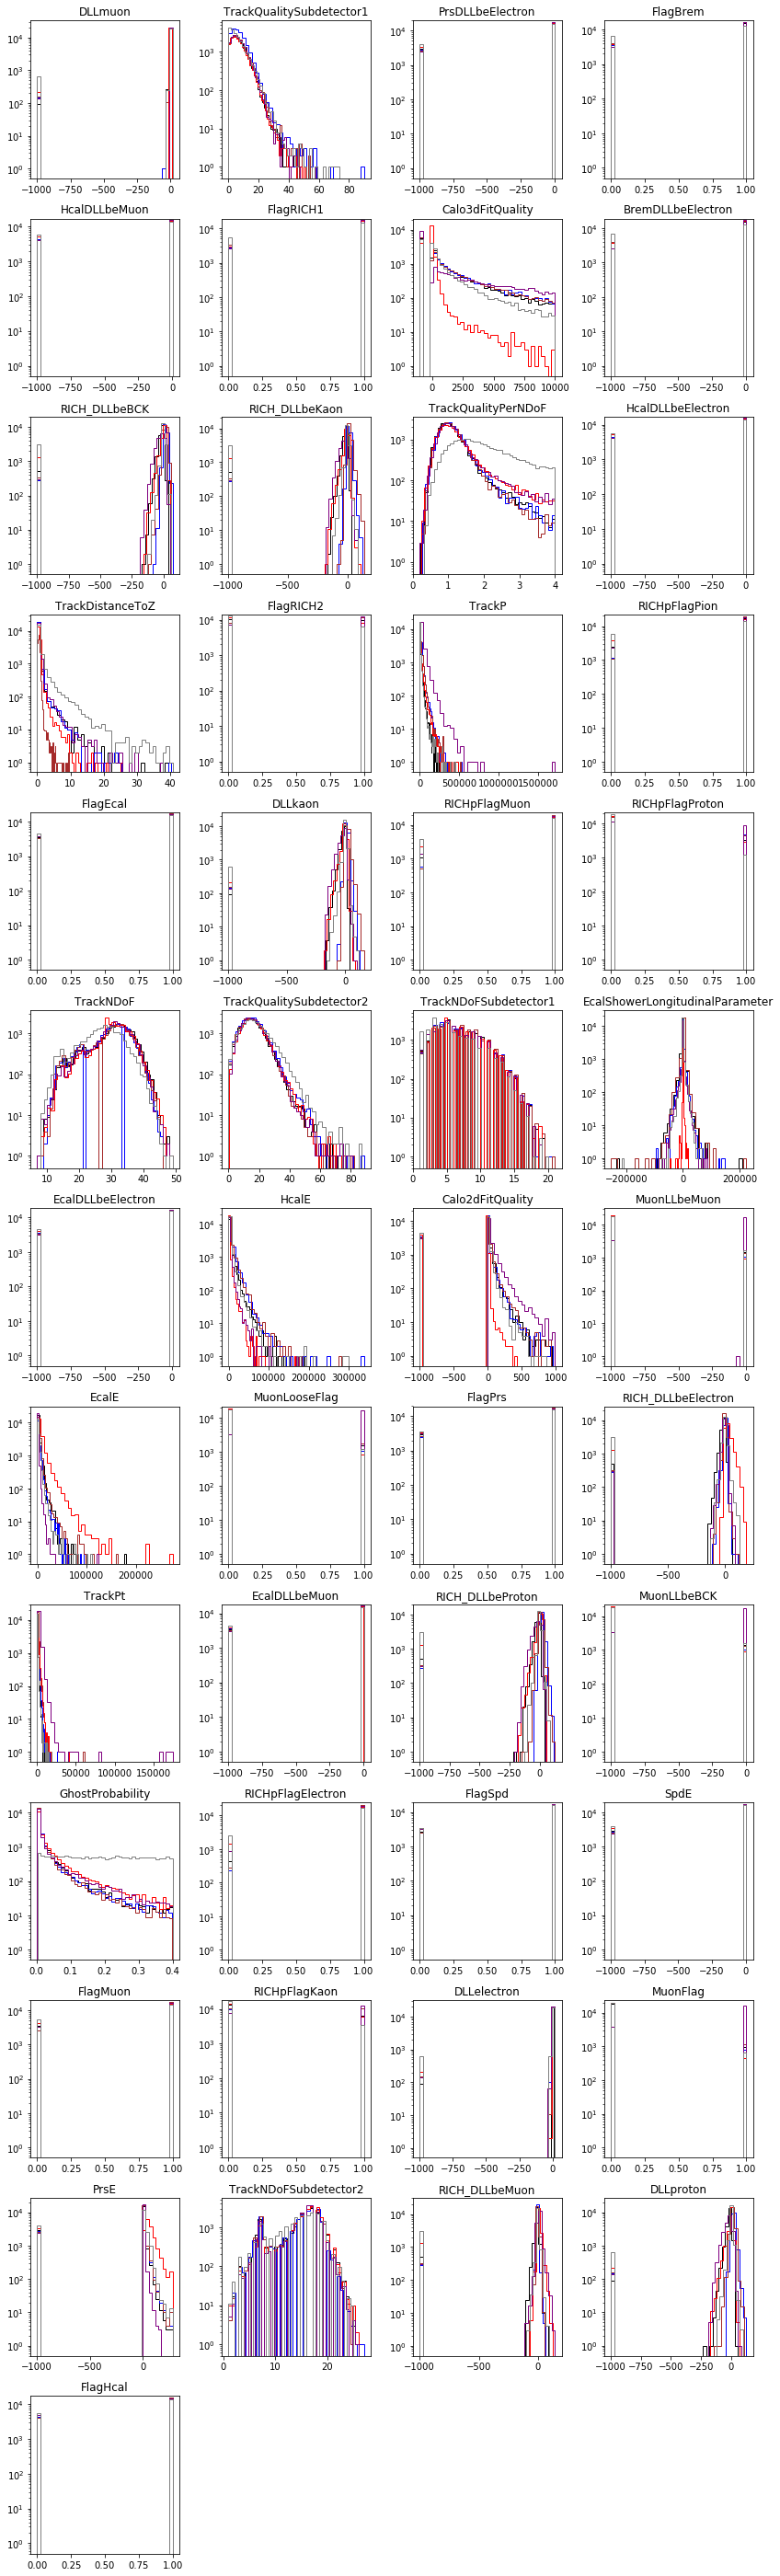

In [78]:
plots(X_train[features[:]],y_train)

In [140]:
X_train.columns

Index(['DLLmuon', 'TrackQualitySubdetector1', 'PrsDLLbeElectron', 'FlagBrem',
       'HcalDLLbeMuon', 'FlagRICH1', 'Calo3dFitQuality', 'BremDLLbeElectron',
       'RICH_DLLbeBCK', 'RICH_DLLbeKaon', 'TrackQualityPerNDoF',
       'HcalDLLbeElectron', 'TrackDistanceToZ', 'FlagRICH2', 'TrackP',
       'RICHpFlagPion', 'FlagEcal', 'DLLkaon', 'RICHpFlagMuon',
       'RICHpFlagProton', 'TrackNDoF', 'TrackQualitySubdetector2',
       'TrackNDoFSubdetector1', 'EcalShowerLongitudinalParameter',
       'EcalDLLbeElectron', 'HcalE', 'Calo2dFitQuality', 'MuonLLbeMuon',
       'EcalE', 'MuonLooseFlag', 'FlagPrs', 'RICH_DLLbeElectron', 'TrackPt',
       'EcalDLLbeMuon', 'RICH_DLLbeProton', 'MuonLLbeBCK', 'GhostProbability',
       'RICHpFlagElectron', 'FlagSpd', 'SpdE', 'FlagMuon', 'RICHpFlagKaon',
       'DLLelectron', 'MuonFlag', 'PrsE', 'TrackNDoFSubdetector2',
       'RICH_DLLbeMuon', 'DLLproton', 'FlagHcal'],
      dtype='object')

In [141]:
[ x for x in X_train.columns if "Flag" in x ]

['FlagBrem',
 'FlagRICH1',
 'FlagRICH2',
 'RICHpFlagPion',
 'FlagEcal',
 'RICHpFlagMuon',
 'RICHpFlagProton',
 'MuonLooseFlag',
 'FlagPrs',
 'RICHpFlagElectron',
 'FlagSpd',
 'FlagMuon',
 'RICHpFlagKaon',
 'MuonFlag',
 'FlagHcal']

In [154]:
[ x for x in X_train.columns if x.startswith("DLL") ]

['DLLmuon', 'DLLkaon', 'DLLelectron', 'DLLproton']

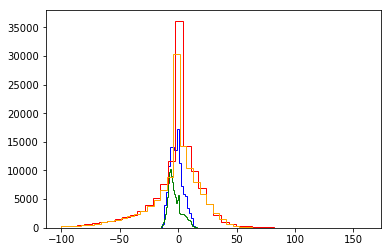

In [159]:
args={"bins":40,"histtype":'step',"stacked":False,"fill":False}
plt.hist(X_train['DLLmuon'][(X_train['DLLmuon']>-100.)],**args,color="blue")
plt.hist(X_train['DLLelectron'][(X_train['DLLelectron']>-100.)],**args,color="green")
plt.hist(X_train['DLLkaon'][(X_train['DLLkaon']>-100.)],**args,color="red")
plt.hist(X_train['DLLproton'][(X_train['DLLproton']>-100.)],**args,color="orange")
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


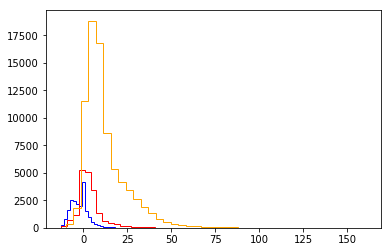

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,DLLmuon,DLLelectron,DLLproton,DLLkaon,Guess,Max,Label,match
1148256,6.139967,-7.246798,-11.650607,-13.567707,Muon,6.139967,Muon,True
830742,1.741957,14.757956,21.806896,21.616596,Proton,21.806896,Electron,False
556579,-4.775853,-6.927809,3.997112,3.448712,Proton,3.997112,Proton,True
613247,-0.290064,-0.054451,-1.468110,12.610890,Kaon,12.610890,Kaon,True
495782,-1.608283,-6.714527,6.754804,6.051604,Proton,6.754804,Ghost,False
871785,-1.471701,-2.436127,-0.038602,-0.000002,Kaon,-0.000002,Muon,False
132282,-4.594287,1.913523,0.000014,0.000014,Electron,1.913523,Ghost,False
915656,-3.006170,1.092299,3.217706,32.177207,Kaon,32.177207,Kaon,True
47976,5.765436,-2.101820,13.263007,11.337408,Proton,13.263007,Proton,True
442526,-9.195194,-4.750637,-1.956509,-1.001208,Kaon,-1.001208,Ghost,False


In [248]:
df = X_train[['DLLmuon','DLLelectron','DLLproton','DLLkaon']]
df['Guess'] = df.idxmax(axis=1)

args={"bins":40,"histtype":'step',"stacked":False,"fill":False}
df['Max'] = df.max(axis=1)
plt.hist(df['Max'][(df['Max']>-100.)&(y_train=="Pion")],**args,color="blue")
plt.hist(df['Max'][(df['Max']>-100.)&(y_train=="Ghost")],**args,color="red")
plt.hist(df['Max'][(df['Max']>-100.)&(y_train!="Ghost")&(y_train!="Pion")],**args,color="orange")
plt.show()

df['Guess'] = df['Guess'].apply(lambda x : x.strip('DLL').title())
df['Label'] = y_train
df['match'] = df['Guess'] == y_train
df

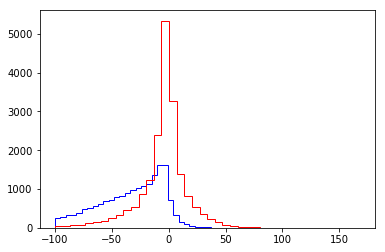

In [245]:
df['Guess'][<0.] = 'DLLpion'

df.max(axis=1)

df['DLLsum'] = df.sum(axis=1)
args={"bins":40,"histtype":'step',"stacked":False,"fill":False}
plt.hist(df['DLLsum'][(df['DLLsum']>-100.)&(y_train=="Pion")],**args,color="blue")
plt.hist(df['DLLsum'][(df['DLLsum']>-100.)&(y_train=="Ghost")],**args,color="red")
plt.show()



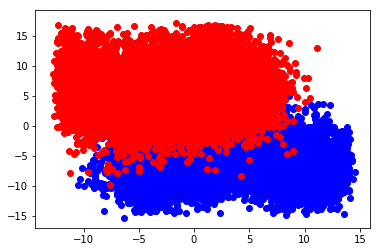

In [139]:
plt.scatter(X_train['DLLmuon'][(X_train['DLLmuon']>-100.)&(y_train=="Muon")],
            X_train['DLLelectron'][(X_train['DLLelectron']>-100.)&(y_train=="Muon")],
            color="blue")
plt.scatter(X_train['DLLmuon'][(X_train['DLLelectron']>-100.)&(y_train=="Electron")],
            X_train['DLLelectron'][(X_train['DLLelectron']>-100.)&(y_train=="Electron")],
            color="red")
plt.scatter(X_train['DLLmuon'][(X_train['DLLelectron']>-100.)&(y_train=="Electron")],
            X_train['DLLelectron'][(X_train['DLLelectron']>-100.)&(y_train=="Electron")],
            color="red")
plt.show()

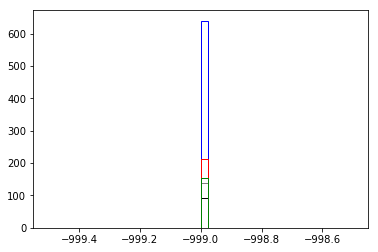

In [153]:
args={"bins":40,"histtype":'step',"stacked":False,"fill":False}
plt.hist(X_train['DLLmuon'][(X_train['DLLmuon']<-100.)&(y_train=="Pion")],**args,color="black")
plt.hist(X_train['DLLmuon'][(X_train['DLLmuon']<-100.)&(y_train=="Muon")],**args,color="gray")
plt.hist(X_train['DLLmuon'][(X_train['DLLmuon']<-100.)&(y_train=="Ghost")],**args,color="blue")
plt.hist(X_train['DLLmuon'][(X_train['DLLmuon']<-100.)&(y_train=="Electron")],**args,color="red")
plt.hist(X_train['DLLmuon'][(X_train['DLLmuon']<-100.)&(y_train=="Kaon")],**args,color="green")
#plt.hist(X_train['DLLmuon'][(X_train['DLLmuon']<-100.)&(y_train=="Pion")],**args,color="black")
#plt.hist(X_train['DLLmuon'][(X_train['DLLmuon']<-100.)&(y_train=="Pion")],**args,color="black")



        
#plt.scatter(X_train['DLLmuon'][(X_train['DLLmuon']<-100.)&(y_train=="Muon")],
#            X_train['DLLelectron'][(X_train['DLLelectron']<-100.)&(y_train=="Muon")],
#            color="blue")
#plt.scatter(X_train['DLLmuon'][(X_train['DLLelectron']<-100.)&(y_train=="Electron")],
#            X_train['DLLelectron'][(X_train['DLLelectron']<-100.)&(y_train=="Electron")],
#            color="red")
plt.show()


In [ ]:
plt.scatter(X_train['DLLmuon'][(X_train['DLLmuon']>-100.)&(y_train=="Muon")],
            X_train['DLLelectron'][(X_train['DLLelectron']>-100.)&(y_train=="Muon")],
            color="blue")

In [ ]:
plt.scatter(X_train['FlagMuon'],X_train['MuonFlag'])
plt.show()

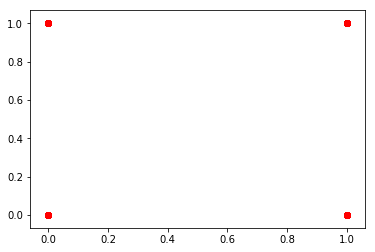

In [147]:
plt.scatter(X_train['MuonFlag'][y_train=="Muon"],
            X_train['FlagMuon'][y_train=="Muon"],
            color="blue")
plt.scatter(X_train['MuonFlag'][y_train=="Muon"],
            X_train['FlagMuon'][y_train=="Muon"],
            color="red")
plt.show()